<a href="https://colab.research.google.com/github/frederikvanduuren/Mentor/blob/master/Fred_4_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

# Observations:

1.   I did find out the order of using first bigger kernel and then small kernels, resulted in less total params
2.   Using higher kernels at start, to be able to find as fast/early possibly local features
3.   I also found out that we only have 3 options to reduce the total number of parameters:

*   Convolution2D(X, 1, activation='relu') reduces the output to size X
*   Convolution2D(10, Y)) reduces the output's first 2 values to 1 (works like an encoder)
*   MaxPooling2D(pool_size = (2, 2)) halfs the size by 2





So all we had to do is play with these findings to reduce the number of parameters and to find enought spacial room in our model to fit 99,5%!

In [1]:
# https://keras.io/
#!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# import models/layers to be able to apply Convolution2D/MaxPooling2D/Flatten

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


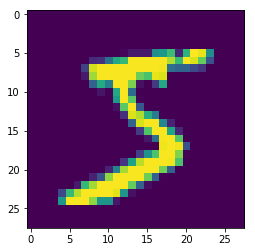

In [4]:
# training is consisting og 60k images of size 28x28 pixels
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# transform our dataset from having shape (n, width, height) to (n, width, height, depth=1) for tensorflow, the format is (N,H,W,C)


X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# process the input data is to convert our data type to float32 and normalizing values between 0 and 1

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# is new shape (60000,28,28,1)
print (X_train.shape)
# the first 10 training target values
y_train[:10]

(60000, 28, 28, 1)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# 0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 2 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] ... 9 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#Y_train[:10]


In [20]:
# Test 1 but the many params: 27k
from keras.layers import Activation
model = Sequential()

# output_channels * (input_channels * window_size + 1) == number_parameters
 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 1, 10)          8010      
_________________________________________________________________
flatten_4 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_4 (Activation)    (None, 10)               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [21]:
# Test 2 reverse the numbers 64<->32but the many params: 35k
from keras.layers import Activation
model = Sequential()

# output_channels * (input_channels * window_size + 1) == number_parameters
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 1, 10)          16010     
_________________________________________________________________
flatten_5 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_5 (Activation)    (None, 10)               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [22]:
# Test 3 adding Convolution2D(X, 1, activation='relu') to reduce total parameters
# wow only 7k parameters
# so we can start with bigger kernels
from keras.layers import Activation
model = Sequential()

# output_channels * (input_channels * window_size + 1) == number_parameters
 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 10)        650       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 32)        2912      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 10)        330       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 1, 10)         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':


In [18]:
# Test 4 starting with 128 & 64 kernels
# again 11k parameters
# Accuracy of 99.5%
model = Sequential()

# output_channels * (input_channels * window_size + 1) == number_parameters
 
model.add(Convolution2D(128, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 10)        1290      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        5824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 10)        650       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 10)         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':


In [37]:
# Test 5 finding the max number of kernels staying below 15k params
# 12k parameters
# Also accuracy of 99.6%
model = Sequential()

# output_channels * (input_channels * window_size + 1) == number_parameters
 
model.add(Convolution2D(128, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 26, 26, 16)        2064      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 11, 11, 16)        528       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 1, 1, 10)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [39]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/15
60000/60000 [==============================] - 21s 343us/step - loss: 0.1940 - acc: 0.9391
Epoch 2/15
60000/60000 [==============================] - 20s 328us/step - loss: 0.0667 - acc: 0.9798
Epoch 3/15
60000/60000 [==============================] - 20s 331us/step - loss: 0.0517 - acc: 0.9840
Epoch 4/15
60000/60000 [==============================] - 20s 330us/step - loss: 0.0432 - acc: 0.9868
Epoch 5/15
60000/60000 [==============================] - 20s 329us/step - loss: 0.0363 - acc: 0.9886
Epoch 6/15
60000/60000 [==============================] - 20s 332us/step - loss: 0.0321 - acc: 0.9902
Epoch 7/15
60000/60000 [==============================] - 20s 330us/step - loss: 0.0286 - acc: 0.9907
Epoch 8/15
60000/60000 [==============================] - 20s 334us/step - loss: 0.0254 - acc: 0.9917
Epoch 9/15
60000/60000 [==============================] - 20s 328us/step - loss: 0.0221 - acc: 0.9930
Epoch 10/15
60000/60000 [==============================] - 20s 330us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [13]:
print(score)

[0.051794750635828224, 0.9899]


In [0]:
y_pred = model.predict(X_test)

In [15]:
print(y_pred[:9])
print(y_test[:9])

[[1.28241096e-21 3.25532543e-26 2.32424358e-16 5.59636786e-16
  7.18666074e-27 1.71655224e-22 2.42713403e-30 1.00000000e+00
  7.35327375e-19 4.11996190e-15]
 [4.29902533e-13 1.51641422e-13 1.00000000e+00 1.56194877e-15
  2.62623620e-18 8.21966053e-23 6.86021852e-15 5.91917994e-23
  1.88524083e-16 7.85259364e-16]
 [9.09356126e-18 9.99999046e-01 1.77464068e-11 1.57852742e-15
  9.96827225e-07 7.78046239e-11 8.56176160e-14 3.89289845e-09
  1.96550087e-09 2.36769328e-12]
 [1.00000000e+00 4.33846196e-26 9.12791715e-16 4.51092607e-18
  6.63262056e-19 2.44519857e-16 1.05976426e-11 1.87529945e-16
  4.23365490e-15 2.59644567e-15]
 [1.13142385e-17 1.09656697e-18 2.90623721e-17 4.78479136e-20
  1.00000000e+00 8.28175717e-16 5.92091449e-17 5.98542566e-19
  4.99445731e-17 1.90128704e-10]
 [5.13986441e-17 1.00000000e+00 5.64667453e-13 4.04985064e-18
  1.50041235e-09 3.32524196e-14 3.09637692e-17 1.63628666e-08
  3.30677846e-11 8.88075475e-13]
 [6.23810543e-31 2.52417618e-15 9.47669885e-16 3.61234508e

In [40]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
for layers in layer_dict:
  print(layers)

conv2d_73
conv2d_74
max_pooling2d_33
conv2d_75
conv2d_76
max_pooling2d_34
conv2d_77
flatten_17
activation_17


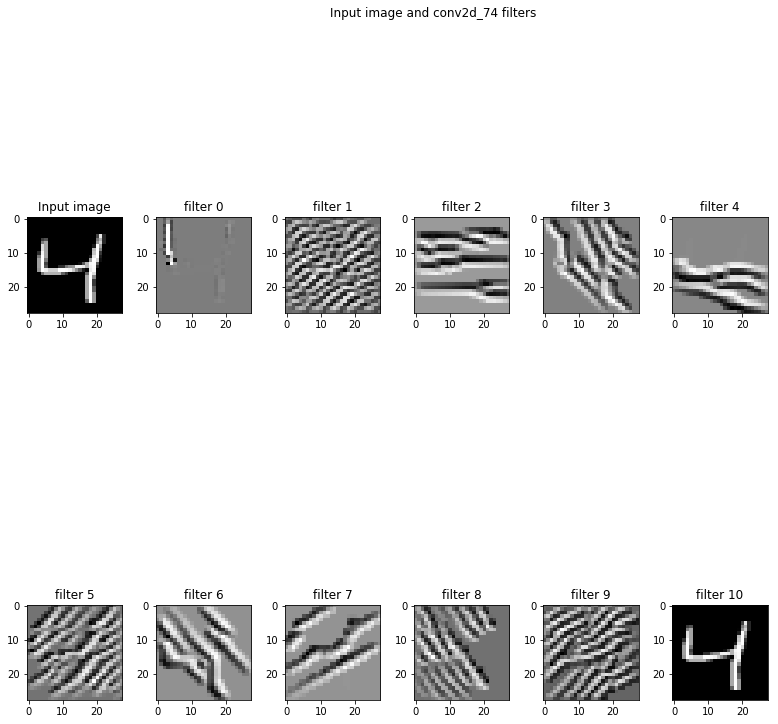

In [42]:
# code from Kaggle competition ;)

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_74'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()